In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import ipywidgets as wid
from IPython.display import display
from ipywidgets import interact
import plotly.express as px


In [ ]:
df = pd.read_csv("matches.csv")
matches = pd.read_csv("matches.csv")

In [ ]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [ ]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [ ]:
df = df.drop("umpire3",axis=1)

In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

      id  season  ...          umpire1         umpire2
4      5    2017  ...              NaN             NaN
300  301    2011  ...        SS Hazare       RJ Tucker
461  462    2014  ...        Aleem Dar    AK Chaudhary
462  463    2014  ...        Aleem Dar     VA Kulkarni
466  467    2014  ...  HDPK Dharmasena  RK Illingworth
468  469    2014  ...        M Erasmus          S Ravi
469  470    2014  ...        BF Bowden       M Erasmus
474  475    2014  ...        BF Bowden          S Ravi
476  477    2014  ...  HDPK Dharmasena       M Erasmus
545  546    2015  ...        JD Cloete       PG Pathak
570  571    2015  ...  HDPK Dharmasena    K Srinivasan

[11 rows x 17 columns]


In [ ]:
print('Total no. of Cities: ', df['city'].nunique())
print('Total no. of Teams: ', df['team2'].nunique())
print('Total no. of Seasons: ', df['season'].nunique())
print('Total no. of Venue: ', df['venue'].nunique())

Total no. of Cities:  30
Total no. of Teams:  14
Total no. of Seasons:  10
Total no. of Venue:  35


In [ ]:
df.iloc[461]

id                                                 462
season                                            2014
city                                               NaN
date                                        2014-04-19
team1                                   Mumbai Indians
team2                      Royal Challengers Bangalore
toss_winner                Royal Challengers Bangalore
toss_decision                                    field
result                                          normal
dl_applied                                           0
winner                     Royal Challengers Bangalore
win_by_runs                                          0
win_by_wickets                                       7
player_of_match                               PA Patel
venue              Dubai International Cricket Stadium
umpire1                                      Aleem Dar
umpire2                                   AK Chaudhary
Name: 461, dtype: object

In [ ]:
df_final = df.drop(df.index[300])

In [ ]:
df_final.head(301)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297,2011,Chennai,2011-05-18,Chennai Super Kings,Kochi Tuskers Kerala,Chennai Super Kings,bat,normal,0,Chennai Super Kings,11,0,WP Saha,"MA Chidambaram Stadium, Chepauk",HDPK Dharmasena,RE Koertzen
297,298,2011,Mumbai,2011-05-19,Pune Warriors,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,YK Pathan,Dr DY Patil Sports Academy,S Ravi,SJA Taufel
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
299,300,2011,Dharamsala,2011-05-21,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Deccan Chargers,82,0,S Dhawan,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba


In [ ]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [ ]:
df.iloc[461].replace(np.nan, "Mumbai")

id                                                 462
season                                            2014
city                                            Mumbai
date                                        2014-04-19
team1                                   Mumbai Indians
team2                      Royal Challengers Bangalore
toss_winner                Royal Challengers Bangalore
toss_decision                                    field
result                                          normal
dl_applied                                           0
winner                     Royal Challengers Bangalore
win_by_runs                                          0
win_by_wickets                                       7
player_of_match                               PA Patel
venue              Dubai International Cricket Stadium
umpire1                                      Aleem Dar
umpire2                                   AK Chaudhary
Name: 461, dtype: object

In [ ]:
df[['team1','team2','winner']]

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...
631,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore
633,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


In [ ]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [ ]:
matches.venue.value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [ ]:
matches.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [ ]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

In [ ]:
win=list(matches['winner'].unique())
win.pop(13)
win

['Sunrisers Hyderabad',
 'Rising Pune Supergiant',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Mumbai Indians',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Pune Warriors',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

In [ ]:
d=dict(matches['winner'].value_counts())
d

{'Chennai Super Kings': 79,
 'Deccan Chargers': 29,
 'Delhi Daredevils': 62,
 'Gujarat Lions': 13,
 'Kings XI Punjab': 70,
 'Kochi Tuskers Kerala': 6,
 'Kolkata Knight Riders': 77,
 'Mumbai Indians': 92,
 'Pune Warriors': 12,
 'Rajasthan Royals': 63,
 'Rising Pune Supergiant': 10,
 'Rising Pune Supergiants': 5,
 'Royal Challengers Bangalore': 73,
 'Sunrisers Hyderabad': 42}

In [ ]:

dict(matches[matches['season']==2015]['winner'].value_counts())

{'Chennai Super Kings': 10,
 'Delhi Daredevils': 5,
 'Kings XI Punjab': 3,
 'Kolkata Knight Riders': 7,
 'Mumbai Indians': 10,
 'Rajasthan Royals': 7,
 'Royal Challengers Bangalore': 8,
 'Sunrisers Hyderabad': 7}

In [ ]:
def select(season = 'All'):
    if season=='All':
        d=dict(matches['winner'].value_counts())
        display(px.bar(x=list(d.keys()),y=list(d.values())))
        
    else:
        d = dict(matches[matches['season']==int(season)]['winner'].value_counts())
        display(px.bar(x=list(d.keys()),y=list(d.values()),title='Number of wins season wise',labels=dict(x="Team", y="No. of wins")))

year = wid.Dropdown(
    options=list(matches.season.unique())+['All'],
    value='All',
    description='Year:',
)

interact(select,season=year)


interactive(children=(Dropdown(description='Year:', index=10, options=(2017, 2008, 2009, 2010, 2011, 2012, 201…

<function __main__.select>

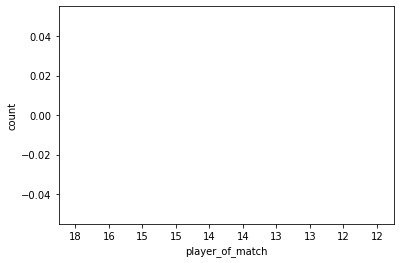

In [ ]:
sns.countplot(x="player_of_match" , data=df,order=df['player_of_match'].value_counts().head(10))

In [ ]:
df.player_of_match.value_counts()

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
                  ..
TL Suman           1
RJ Harris          1
SB Jakati          1
TM Dilshan         1
JC Buttler         1
Name: player_of_match, Length: 201, dtype: int64

In [ ]:
print('Total number of players who won player of the match: ', df['player_of_match'].nunique())

print('players who won player of the match title most of time: ')
df['player_of_match'].value_counts().head(10)

Total number of players who won player of the match:  201
players who won player of the match title most of time: 


CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

In [ ]:
df.groupby(["team1","team2"]).sum()

id  ...  win_by_wickets
team1               team2                              ...                
Chennai Super Kings Deccan Chargers              1745  ...              19
                    Delhi Daredevils             3830  ...              28
                    Kings XI Punjab              2511  ...              18
                    Kochi Tuskers Kerala          549  ...               7
                    Kolkata Knight Riders        4066  ...              32
...                                               ...  ...             ...
Sunrisers Hyderabad Pune Warriors                 786  ...               0
                    Rajasthan Royals             3355  ...              22
                    Rising Pune Supergiant         25  ...               6
                    Rising Pune Supergiants      1214  ...               0
                    Royal Challengers Bangalore  2721  ...              17

[127 rows x 5 columns]

In [ ]:
for i in range(3,5):
  z = df.loc[(df["season"] == 2010+i) & (df["venue"].str.contains("Wankhede Stadium"))]
  print(z.winner)

389    Mumbai Indians
394    Mumbai Indians
416    Mumbai Indians
420    Mumbai Indians
429    Mumbai Indians
433    Mumbai Indians
443    Mumbai Indians
446    Mumbai Indians
Name: winner, dtype: object
478         Mumbai Indians
483         Mumbai Indians
489    Chennai Super Kings
507         Mumbai Indians
512         Mumbai Indians
515        Kings XI Punjab
Name: winner, dtype: object


In [ ]:
df[df['win_by_wickets']==10][['season','team1', 'team2','winner','win_by_wickets','player_of_match']]

,season,team1,team2,winner,win_by_wickets,player_of_match
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10,CA Lynn
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10,Sandeep Sharma
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,AC Gilchrist
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,10,DL Vettori
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,JH Kallis
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,SR Watson
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10,DR Smith
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,10,MEK Hussey
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10,VR Aaron
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10,B Kumar


In [ ]:
df[df['win_by_runs']>=100][['season','team1', 'team2','winner','win_by_runs','player_of_match']]

,season,team1,team2,winner,win_by_runs,player_of_match
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146,LMP Simmons
59,2008,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,140,BB McCullum
114,2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,105,SR Watson
295,2011,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,111,AC Gilchrist
410,2013,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130,CH Gayle
556,2015,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138,CH Gayle
619,2016,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144,AB de Villiers


In [ ]:
df[(df['result']=='tie')|(df['result']=='no result')][['date','team1','team2', 'result', 'winner']]

,date,team1,team2,result,winner
33,2017-04-29,Gujarat Lions,Mumbai Indians,tie,Mumbai Indians
125,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,tie,Rajasthan Royals
189,2010-03-21,Kings XI Punjab,Chennai Super Kings,tie,Kings XI Punjab
300,2011-05-21,Delhi Daredevils,Pune Warriors,no result,NaN
387,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,tie,Sunrisers Hyderabad
400,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,tie,Royal Challengers Bangalore
475,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,tie,Rajasthan Royals
535,2015-04-21,Rajasthan Royals,Kings XI Punjab,tie,Kings XI Punjab
545,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,no result,NaN
570,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,no result,NaN


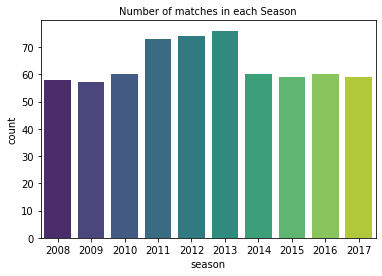

In [ ]:
sns.countplot(x = df['season'].sort_values(), palette = 'viridis')
plt.title('Number of matches in each Season', fontsize = 10)
plt.show()

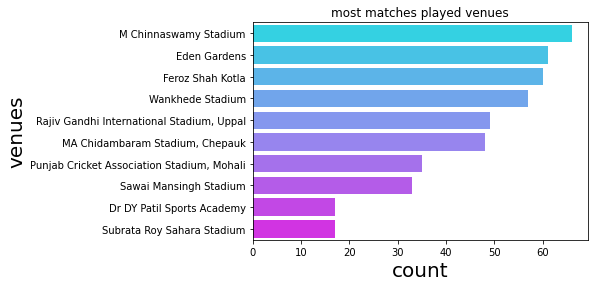

In [ ]:
sns.barplot(y=df['venue'].value_counts().head(10).index, x=df['venue'].value_counts().head(10).values, palette = 'cool')
plt.title('most matches played venues', fontsize=12)
plt.xlabel('count', fontsize=20)
plt.ylabel('venues',fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



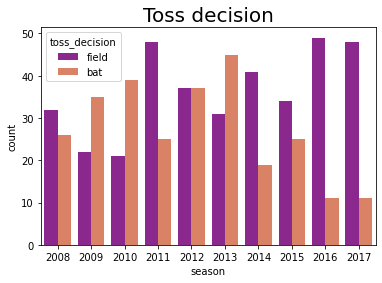

In [ ]:
sns.countplot(df['season'].sort_values(), hue = df['toss_decision'], palette = 'plasma')
plt.title("Toss decision", fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



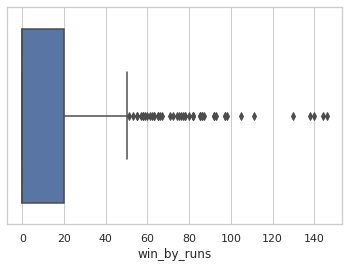

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['win_by_runs'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



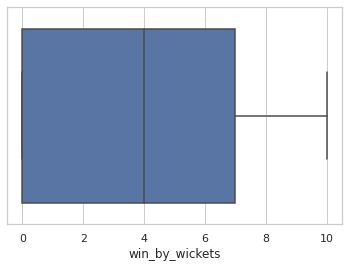

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(df['win_by_wickets'])

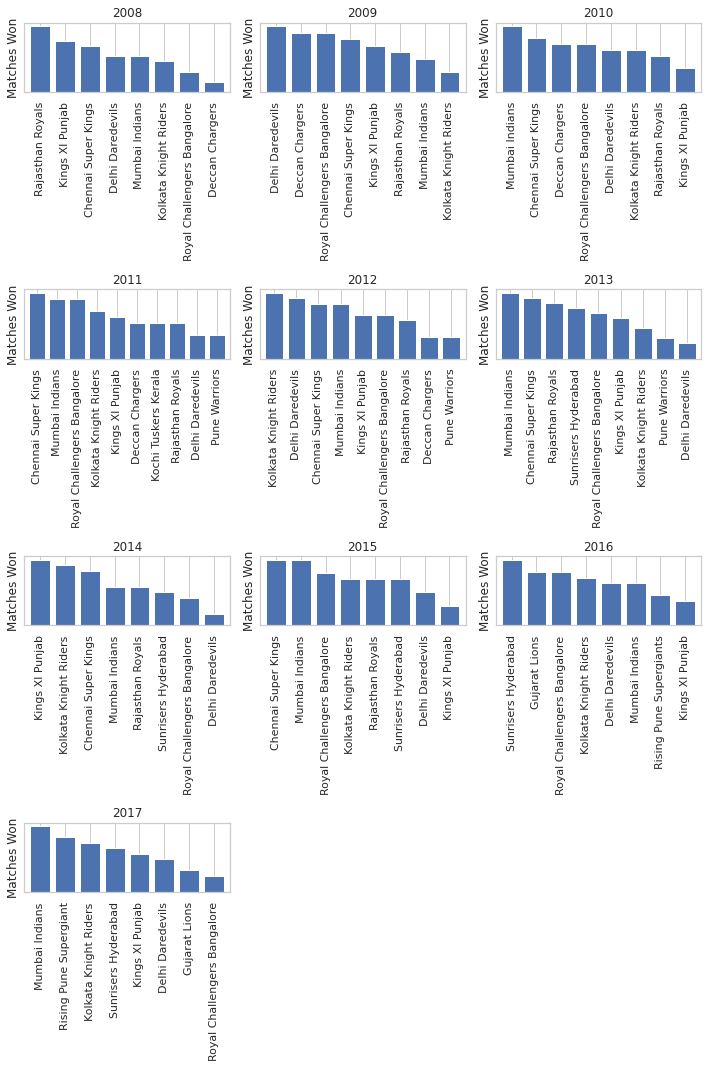

In [ ]:
max_times_winner = df.groupby('season')['winner'].value_counts()

count=1
fig = plt.figure()

groups=max_times_winner.groupby('season')
for year,group in groups:       #the first parameter is the left most first group ie season here and ssecond is 
    ax = fig.add_subplot(4,3,count)    #4rows 3 columns count represnets position in the row eg 2 is top left
    ax.set_title(year)
    ax=group[year].plot(kind="bar",figsize=(10,15),width=0.8)
    count=count+1
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
   # totals = []
   # for i in ax.patches:
    #    totals.append(i.get_height())
   # total = sum(totals)
   # for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    #    ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="white",fontweight='bold')
    
    
plt.tight_layout()
plt.show()

In [ ]:
max_times_winner = df.groupby('season')['winner'].value_counts()

groups=max_times_winner.groupby('season')

for yer,grou in groups:
  print(grou[yer])

winner
Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
Name: winner, dtype: int64
winner
Delhi Daredevils               10
Deccan Chargers                 9
Royal Challengers Bangalore     9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: winner, dtype: int64
winner
Mumbai Indians                 11
Chennai Super Kings             9
Deccan Chargers                 8
Royal Challengers Bangalore     8
Delhi Daredevils                7
Kolkata Knight Riders           7
Rajasthan Royals                6
Kings XI Punjab                 4
Name: winner, dtype: int64
winner
Chennai Super Kings            11
Mumbai Indians                 10
Royal C

In [ ]:
max_times_winner = df.groupby('season')["player_of_match"].value_counts()
print(max_times_winner)


season  player_of_match  
2008    SE Marsh             5
        SR Watson            4
        YK Pathan            4
        AC Gilchrist         2
        M Ntini              2
                            ..
2017    SS Iyer              1
        SV Samson            1
        WP Saha              1
        Washington Sundar    1
        Yuvraj Singh         1
Name: player_of_match, Length: 435, dtype: int64
